In [28]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture

import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
df = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
X = df.copy()
X = X.drop('species', axis=1)#to create unlabelled data
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [7]:
mms = MinMaxScaler()
mms.fit(X)
Xnorm = mms.transform(X)
Xnorm.shape

(150, 4)

In [9]:
#converting the multi dimentional data to 2D
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
principal_comp=pca.fit_transform(Xnorm)
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558


ELBOW METHOD TO DETERMINE IDEAL K MODEL

In [10]:
Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(Xnorm)
    Sum_of_squared_distances.append(km.inertia_)

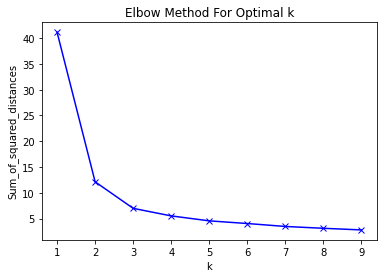

In [11]:
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
#K=3

In [13]:
train_data = Xnorm.copy()

K-Means

In [14]:
# kmeans clustering
def train_kmeans(k,X):
 kmeans_model = KMeans(n_clusters=k)
 y_pred = kmeans_model.fit_predict(train_data)
 print("Spectral Clustering : clusters : ",k ," silhouette_score :",silhouette_score(train_data,y_pred,metric="sqeuclidean") )

In [15]:
# kmeans clustering
clusters=[3,4,5,6]
for i in clusters:
 train_kmeans(i,train_data)

Spectral Clustering : clusters :  3  silhouette_score : 0.6959387676166826
Spectral Clustering : clusters :  4  silhouette_score : 0.6223202965957296
Spectral Clustering : clusters :  5  silhouette_score : 0.5301578290859997
Spectral Clustering : clusters :  6  silhouette_score : 0.5213387057626858


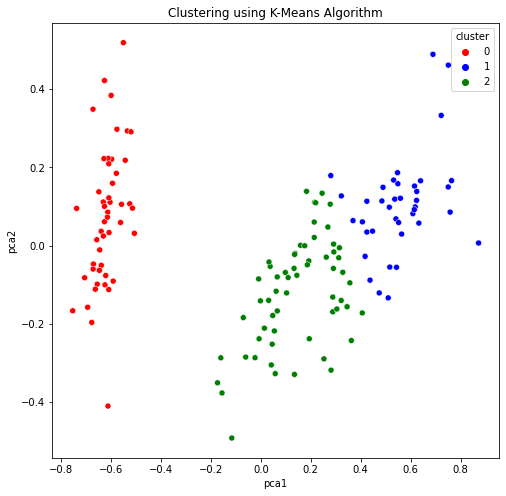

K-Means Clustering-  silhouette_score : 0.6959387676166826


In [16]:
# Model Building
kmeans_model = KMeans(n_clusters=3)
y_pred = kmeans_model.fit_predict(train_data)#y_pred contains the cluster numbers
pca_df_spl=pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)#kmeans.labels_ = y_pred
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl,palette=['red','blue','green'])
plt.title("Clustering using K-Means Algorithm")
plt.show()
print("K-Means Clustering-"," silhouette_score :",silhouette_score(train_data,y_pred,metric="sqeuclidean") )

SPECTRAL


In [17]:
# Spectral clustering
def train_spectral(k,X):
 spectral_model = SpectralClustering(n_clusters=k)
 y_pred = spectral_model.fit_predict(train_data)
 print("Spectral Clustering : clusters : ",k ," silhouette_score :",silhouette_score(X,y_pred,metric="sqeuclidean") )

In [18]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
 train_spectral(i,train_data)

Spectral Clustering : clusters :  3  silhouette_score : 0.6609169456031181
Spectral Clustering : clusters :  4  silhouette_score : 0.5773059420869283
Spectral Clustering : clusters :  5  silhouette_score : 0.46361938242930545
Spectral Clustering : clusters :  6  silhouette_score : 0.4186310806693125


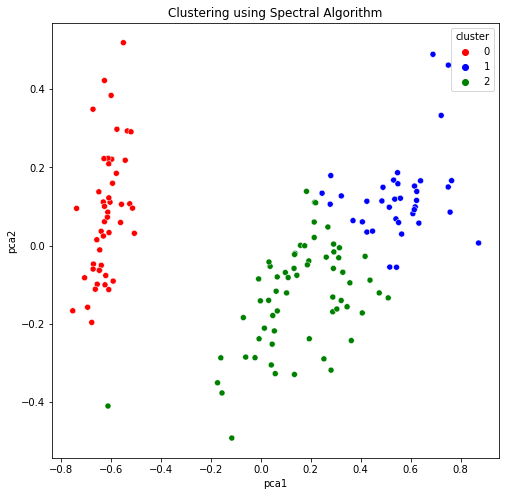

Spectral Clustering-  silhouette_score : 0.6609169456031181


In [19]:
# Model Building
# Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3)
y_pred = spectral_model.fit_predict(train_data)
pca_df_spl=pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)#spectral_model.labels_ = y_pred
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl,palette=['red','blue','green'])
plt.title("Clustering using Spectral Algorithm")
plt.show()
print("Spectral Clustering-"," silhouette_score :",silhouette_score(train_data,y_pred,metric="sqeuclidean") )

Gaussian Mixture

In [20]:
# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
 GaussianMixture_model = GaussianMixture(n_components=k)
 y_pred = GaussianMixture_model.fit_predict(train_data)
 print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score :",silhouette_score(X,y_pred,metric='sqeuclidean') )

In [21]:
# GaussianMixture Model based clustering
clusters=[3,4,5,6]
for i in clusters:
 train_GaussianMixture(i,train_data)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score : 0.6055196928129171
GaussianMixture Model based Clustering : clusters :  4  silhouette_score : 0.4681780929735324
GaussianMixture Model based Clustering : clusters :  5  silhouette_score : 0.5559167083602584
GaussianMixture Model based Clustering : clusters :  6  silhouette_score : 0.2969516761116738


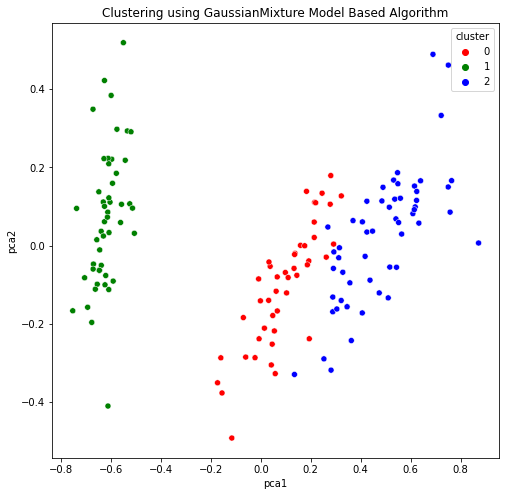

GaussianMixture Model-  silhouette_score : 0.6055196928129171


In [22]:
# GaussianMixture Model based clustering
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(train_data)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()
print("GaussianMixture Model-"," silhouette_score :",silhouette_score(train_data,y_pred,metric='sqeuclidean') )

In [23]:
pca_df_gmm.head()

,pca1,pca2,cluster
0,-0.630361,0.111556,1
1,-0.623546,-0.100313,1
2,-0.669793,-0.047220,1
3,-0.654633,-0.098791,1
4,-0.648263,0.137558,1


DBSCAN

In [24]:
# DBSCAN Clustering
model_dbscan = DBSCAN(eps=0.2, min_samples=5)#change epsilon value to change number of clusters
y_pred = model_dbscan.fit_predict(train_data)

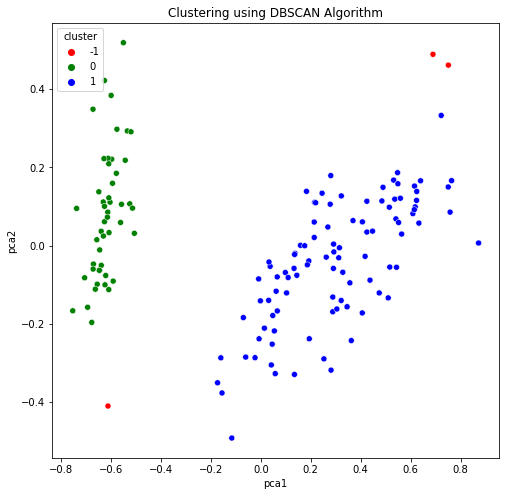

DBSCAN Clustering-  silhouette_score : 0.7433908208579212


In [25]:
pca_df_dbscan=pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['red','green','blue'])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()
print("DBSCAN Clustering-"," silhouette_score :",silhouette_score(train_data,y_pred,metric="sqeuclidean") )

BIRCH

In [31]:
# Birch Model based clustering
def train_birch(k,X):
 birch_model = Birch(n_clusters=k)
 y_pred = birch_model.fit_predict(train_data)
 print("Birch Model based Clustering : clusters : ",k ," silhouette_score :",silhouette_score(X,y_pred,metric='sqeuclidean') )

In [34]:
# Birch Model based clustering
clusters=[3,4,5,6]
for i in clusters:
 train_birch(i,train_data)

Birch Model based Clustering : clusters :  3  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  4  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  5  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  6  silhouette_score : 0.5753123750369741


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (6). Decrease the threshold.
  ConvergenceWarning,


In [38]:
#the above o/p indicates tat only 2 clusters can be made hence we proceed with 2 clusters instead of 3 clusters.

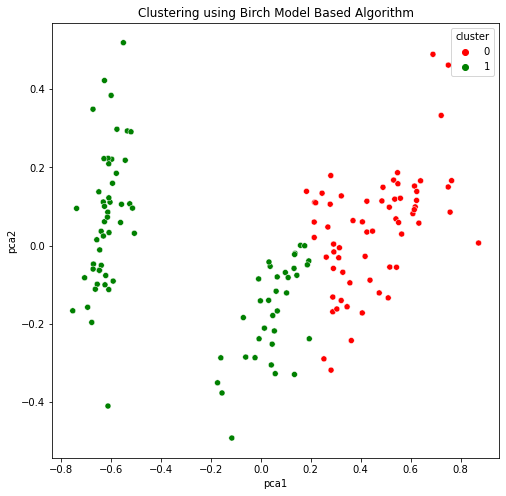

Birch Model-  silhouette_score : 0.5753123750369741


In [39]:
# BIRCH Model based clustering
birch_model = Birch(n_clusters=2)
y_pred = birch_model.fit_predict(train_data)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green'])#only 2 clusters found as mentioned above
plt.title("Clustering using Birch Model Based Algorithm")
plt.show()
print("Birch Model-"," silhouette_score :",silhouette_score(train_data,y_pred,metric='sqeuclidean') )

Mini Batch K-Means

In [40]:
# Birch Model based clustering
def train_miniKM(k,X):
 miniKM_model = MiniBatchKMeans(n_clusters=k)
 y_pred = miniKM_model.fit_predict(train_data)
 print("MiniBatchKMeans Model based Clustering : clusters : ",k ," silhouette_score :",silhouette_score(X,y_pred,metric='sqeuclidean') )

In [ ]:
MiniBatchKMeans

In [41]:
# Birch Model based clustering
clusters=[3,4,5,6]
for i in clusters:
 train_birch(i,train_data)

Birch Model based Clustering : clusters :  3  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  4  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  5  silhouette_score : 0.5753123750369741
Birch Model based Clustering : clusters :  6  silhouette_score : 0.5753123750369741


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (6). Decrease the threshold.
  ConvergenceWarning,


In [42]:
#2 clusters found

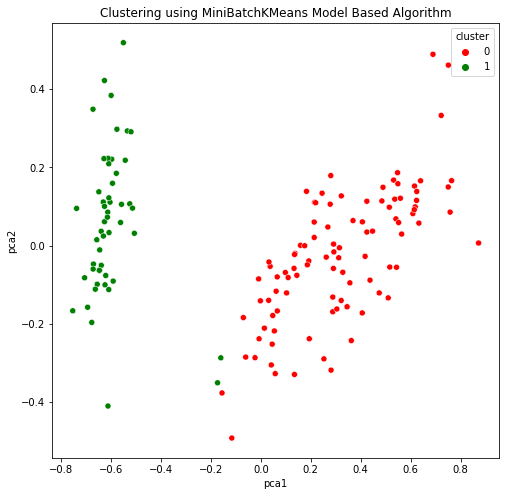

MiniBatchKMeans Model-  silhouette_score : 0.8047694316719541


In [43]:
miniKM_model = MiniBatchKMeans(n_clusters=2)
y_pred = miniKM_model.fit_predict(train_data)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green'])#only 2 clusters found as mentioned above
plt.title("Clustering using MiniBatchKMeans Model Based Algorithm")
plt.show()
print("MiniBatchKMeans Model-"," silhouette_score :",silhouette_score(train_data,y_pred,metric='sqeuclidean') )

AffinityPropagation

In [26]:
af = AffinityPropagation(preference=-3).fit(Xnorm)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [27]:
score = silhouette_score(Xnorm, labels , metric='sqeuclidean')
print(score)

0.6956359811379929
